In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def gaussian_kernel(x, x_query, tau):
    return np.exp(-(x - x_query)**2 / (2 * tau**2))

In [3]:
def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights

    # Compute theta using pseudo-inverse to avoid singular matrix
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y

    return x_query_b @ theta



In [4]:
#any value can be taken
X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,3,2,4,3,5,5,6,6,5])#length of X and y must same

In [5]:
X_query = np.linspace(1,10,100)
#any value can be taken
tau_values = [0.1,0.5,1.0,5.0,10.0]

In [6]:
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))


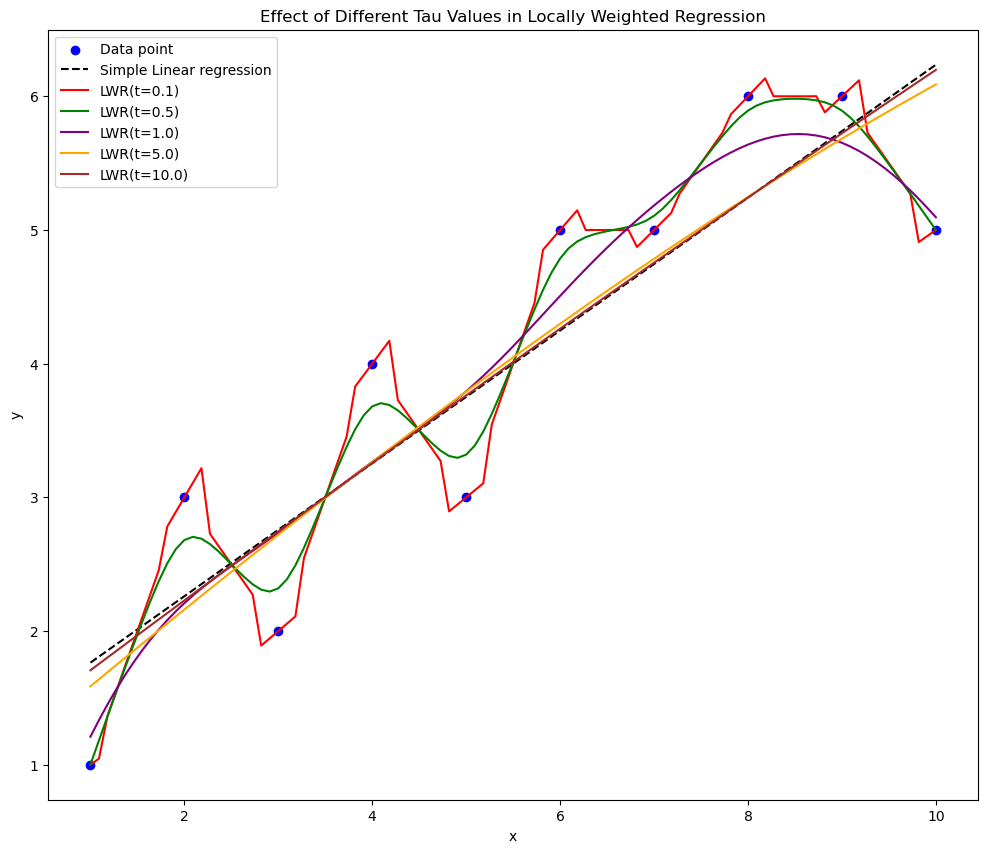

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(X,y,color='blue',label='Data point')
plt.plot(X_query,y_lin,color='black',linestyle='dashed',label='Simple Linear regression')

colors = ['red', 'green', 'purple', 'orange', 'brown']

for tau, color in zip(tau_values, colors):
    y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])
    plt.plot(X_query, y_lwr, color=color, label=f'LWR(t={tau})')

plt.title('Effect of Different Tau Values in Locally Weighted Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()